Dataset Preview:
   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  

After Encoding:
   ssc_p  hsc_p  degree_p  etest_p  mba_p  gender_M  ssc_b_Others  \
0  67.00  91.00     

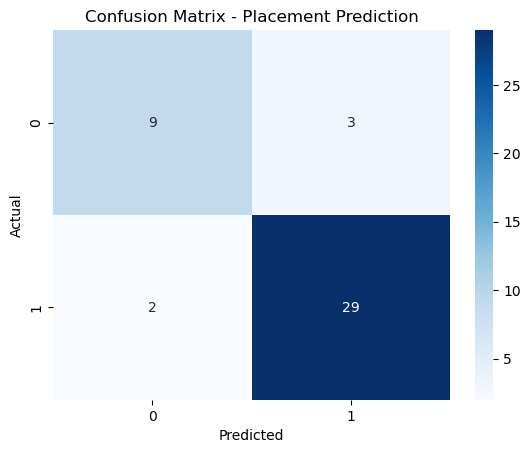

In [5]:
# Logistic Regression for Student Placement Prediction

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load Dataset
data = pd.read_csv("Placement_Data.csv")   

print("Dataset Preview:")
print(data.head())

# 3️⃣ Drop Unnecessary Columns
data = data.drop(["sl_no", "salary"], axis=1)

# 4️⃣ Convert Target Variable (status) to Binary
# Placed = 1, Not Placed = 0
data["status"] = data["status"].map({"Placed": 1, "Not Placed": 0})

# 5️⃣ Separate Features and Target
X = data.drop("status", axis=1)
y = data["status"]

# 6️⃣ One-Hot Encode Categorical Variables
X = pd.get_dummies(X, drop_first=True)

print("\nAfter Encoding:")
print(X.head())

# 7️⃣ Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 9️⃣ Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 🔟 Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 1️⃣1️⃣ Model Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Placement Prediction")
plt.show()
